## Importing Packages and Loading in Models

In [1]:
import torch
torch.__version__

'2.2.2'

In [2]:
!pip install transformers diffusers accelerate safetensors sentencepiece

In [3]:
import torch, transformers, diffusers
from diffusers import StableDiffusionControlNetInpaintPipeline, ControlNetModel
from PIL import Image

In [4]:
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/control_v11p_sd15_inpaint",
    torch_dtype=torch.float16
)

In [5]:
pipe = StableDiffusionControlNetInpaintPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5", 
    controlnet=controlnet, 
    torch_dtype=torch.float16,
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [6]:
pipe.to('cuda:0')

StableDiffusionControlNetInpaintPipeline {
  "_class_name": "StableDiffusionControlNetInpaintPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "stable-diffusion-v1-5/stable-diffusion-v1-5",
  "controlnet": [
    "diffusers",
    "ControlNetModel"
  ],
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [7]:
!pip install git+https://github.com/deepseek-ai/DeepSeek-VL.git

  Cloning https://github.com/deepseek-ai/DeepSeek-VL.git to /tmp/pip-req-build-ah5235uw
  Running command git clone --filter=blob:none --quiet https://github.com/deepseek-ai/DeepSeek-VL.git /tmp/pip-req-build-ah5235uw
  Resolved https://github.com/deepseek-ai/DeepSeek-VL.git to commit 681bffb4519856ad27cc17531aacde31ddf6f1a7
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 67.8 MB/s eta 0:00:00
  Created wheel for deepseek_vl: filename=deepseek_vl-1.0.0-py3-none-any.whl size=58944 sha256=1609409f12fe066432a383b2f600a669faeffc594e8c9eef65af9e780eebde35
  Stored in directory: /tmp/pip-ephem-wheel-cache-szeo90ei/wheels/3f/a1/87/0cd6a5d3439c8135d0ac6cb85fff2317023c4d44fbe5dac871
Successfully built deepseek_vl


In [8]:
# Loading in DeepSeek Model
import torch
from transformers import AutoModelForCausalLM
from deepseek_vl.models import MultiModalityCausalLM, VLChatProcessor
from deepseek_vl.utils.io import load_pil_images

# Specify the model identifier.
model_path = "deepseek-ai/deepseek-vl-7b-chat"

# Load the VLChat processor and tokenizer.
vl_chat_processor: VLChatProcessor = VLChatProcessor.from_pretrained(model_path)
tokenizer = vl_chat_processor.tokenizer

# Load the model.
vl_gpt: MultiModalityCausalLM = AutoModelForCausalLM.from_pretrained(
    model_path, trust_remote_code=True
)
# Move model to GPU (and remove bfloat16 if it causes issues).
vl_gpt = vl_gpt.to(torch.bfloat16).to("cuda:3").eval()

Python version is above 3.10, patching the collections module.


/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/transformers/models/auto/image_processing_auto.py:594: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/3.24k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.61M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.


processor_config.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

Some kwargs in processor config are unused and will not have any effect: sft_format, image_tag, ignore_id, mask_prompt, add_special_token, num_image_tokens. 


config.json:   0%|          | 0.00/1.54k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/81.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.75G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [10]:
vl_gpt.device

device(type='cuda', index=3)

In [159]:
from diffusers import AutoPipelineForInpainting
pipeline = AutoPipelineForInpainting.from_pretrained(
    "diffusers/stable-diffusion-xl-1.0-inpainting-0.1", torch_dtype=torch.float16, variant="fp16"
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


In [160]:
pipeline.to('cuda:2')

StableDiffusionXLInpaintPipeline {
  "_class_name": "StableDiffusionXLInpaintPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "diffusers/stable-diffusion-xl-1.0-inpainting-0.1",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "requires_aesthetics_score": false,
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

## Inputs

In [138]:
sketch = "pant-sketch.png"
person = "standing-person.jpg"

## Generating Prompt for Sketch

In [88]:
import torch
from deepseek_vl.utils.io import load_pil_images

def generate_prompt(prompt, image) -> str:

    ## This prompt can be played around with
    #prompt = "Give me a caption for this background scene. Please describe as many aspects of the scene as you can, with specific descriptions of what is happening in each portion of the image. Please also describe the relative locations of objects and imagery in the scene in relation to each other. "
    conversation = [
        {
            "role": "User",
            # Note: Prepend the placeholder if your model expects it.
            "content": f"<image_placeholder> {prompt}",
            "images": [image]
        },
        {"role": "Assistant", "content": ""},
    ]

    # Load the image(s) for this conversation.
    pil_images = load_pil_images(conversation)
    torch.cuda.set_device("cuda:3")

    # Prepare inputs using the VLChat processor.
    prepare_inputs = vl_chat_processor(
        conversations=conversation, images=pil_images, force_batchify=True
    ).to("cuda")

    # If prepare_inputs does not have a .to() method for all tensors,
    # iterate over its attributes and move any tensor to GPU.
    for key, value in vars(prepare_inputs).items():
        if isinstance(value, torch.Tensor):
            setattr(prepare_inputs, key, value.cuda())

    # Run the image encoder to get image embeddings.
    inputs_embeds = vl_gpt.prepare_inputs_embeds(**prepare_inputs)

    # Generate a response.
    outputs = vl_gpt.language_model.generate(
        inputs_embeds=inputs_embeds,
        attention_mask=prepare_inputs.attention_mask,
        pad_token_id=tokenizer.eos_token_id,
        bos_token_id=tokenizer.bos_token_id,
        eos_token_id=tokenizer.eos_token_id,
        max_new_tokens=512,
        do_sample=False,
        use_cache=True,
    )

    # Decode the output.
    answer = tokenizer.decode(outputs[0].cpu().tolist(), skip_special_tokens=True)
    sft_format = getattr(prepare_inputs, "sft_format", [""])[0]  # Adjust if needed.

    # Save the result.
    result = {
        "prompt": prompt,
        "image": image,
        "response": answer,
    }

    #Print the result for this combination.
    # print(f"{sft_format} {result}\n")
    return answer

In [139]:
# Generating Classification 
classification_prompt = "Please classify this garment. Only respond with one phrase."
garment_type= generate_prompt(classification_prompt, sketch)
garment_type

'Pants'

In [140]:
# Generating Detailed Description
description_prompt = "Give me a caption for this garment. Please describe specific details and attributes of the garment, in a photorealistic manner, so that it can be turned into an image with the caption you provide."
description = generate_prompt(description_prompt, sketch)
description

'The garment appears to be a pair of blue jeans. The image shows the outline of the jeans, which is a straight-cut style with a high-waisted fit. There are four star-shaped embellishments on the front of the jeans, two on each side of the waistband. The stars are evenly spaced and are colored in the same blue as the jeans. The background of the image is white with a dotted pattern, which could be a representation of a plain surface or a piece of paper. The blue color of the jeans and the stars stands out against the white background, making the embellishments and the overall style of the jeans quite noticeable.'

## Loading in Segmentation Model

In [143]:
import random
from dataclasses import dataclass
from typing import Any, List, Dict, Optional, Union, Tuple

import cv2
import torch
import requests
import numpy as np
from PIL import Image
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from transformers import AutoModelForMaskGeneration, AutoProcessor, pipeline

In [144]:
@dataclass
class BoundingBox:
    xmin: int
    ymin: int
    xmax: int
    ymax: int

    @property
    def xyxy(self) -> List[float]:
        return [self.xmin, self.ymin, self.xmax, self.ymax]

@dataclass
class DetectionResult:
    score: float
    label: str
    box: BoundingBox
    mask: Optional[np.array] = None

    @classmethod
    def from_dict(cls, detection_dict: Dict) -> 'DetectionResult':
        return cls(score=detection_dict['score'],
                   label=detection_dict['label'],
                   box=BoundingBox(xmin=detection_dict['box']['xmin'],
                                   ymin=detection_dict['box']['ymin'],
                                   xmax=detection_dict['box']['xmax'],
                                   ymax=detection_dict['box']['ymax']))

In [145]:
def annotate(image: Union[Image.Image, np.ndarray], detection_results: List[DetectionResult]) -> np.ndarray:
    # Convert PIL Image to OpenCV format
    image_cv2 = np.array(image) if isinstance(image, Image.Image) else image
    image_cv2 = cv2.cvtColor(image_cv2, cv2.COLOR_RGB2BGR)

    # Iterate over detections and add bounding boxes and masks
    for detection in detection_results:
        label = detection.label
        score = detection.score
        box = detection.box
        mask = detection.mask

        # Sample a random color for each detection
        color = np.random.randint(0, 256, size=3)

        # Draw bounding box
        cv2.rectangle(image_cv2, (box.xmin, box.ymin), (box.xmax, box.ymax), color.tolist(), 2)
        cv2.putText(image_cv2, f'{label}: {score:.2f}', (box.xmin, box.ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color.tolist(), 2)

        # If mask is available, apply it
        if mask is not None:
            # Convert mask to uint8
            mask_uint8 = (mask * 255).astype(np.uint8)
            contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cv2.drawContours(image_cv2, contours, -1, color.tolist(), 2)

    return cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)

def plot_detections(
    image: Union[Image.Image, np.ndarray],
    detections: List[DetectionResult],
    save_name: Optional[str] = None
) -> None:
    annotated_image = annotate(image, detections)
    plt.imshow(annotated_image)
    plt.axis('off')
    if save_name:
        plt.savefig(save_name, bbox_inches='tight')
    plt.show()

In [146]:
def random_named_css_colors(num_colors: int) -> List[str]:
    """
    Returns a list of randomly selected named CSS colors.

    Args:
    - num_colors (int): Number of random colors to generate.

    Returns:
    - list: List of randomly selected named CSS colors.
    """
    # List of named CSS colors
    named_css_colors = [
        'aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond',
        'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue',
        'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey',
        'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen',
        'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue',
        'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite',
        'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory',
        'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow',
        'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray',
        'lightslategrey', 'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine',
        'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise',
        'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive',
        'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'palevioletred', 'papayawhip',
        'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'rebeccapurple', 'red', 'rosybrown', 'royalblue', 'saddlebrown',
        'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'silver', 'skyblue', 'slateblue', 'slategray', 'slategrey',
        'snow', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'white',
        'whitesmoke', 'yellow', 'yellowgreen'
    ]

    # Sample random named CSS colors
    return random.sample(named_css_colors, min(num_colors, len(named_css_colors)))

def plot_detections_plotly(
    image: np.ndarray,
    detections: List[DetectionResult],
    class_colors: Optional[Dict[str, str]] = None
) -> None:
    # If class_colors is not provided, generate random colors for each class
    if class_colors is None:
        num_detections = len(detections)
        colors = random_named_css_colors(num_detections)
        class_colors = {}
        for i in range(num_detections):
            class_colors[i] = colors[i]


    fig = px.imshow(image)

    # Add bounding boxes
    shapes = []
    annotations = []
    for idx, detection in enumerate(detections):
        label = detection.label
        box = detection.box
        score = detection.score
        mask = detection.mask

        polygon = mask_to_polygon(mask)

        fig.add_trace(go.Scatter(
            x=[point[0] for point in polygon] + [polygon[0][0]],
            y=[point[1] for point in polygon] + [polygon[0][1]],
            mode='lines',
            line=dict(color=class_colors[idx], width=2),
            fill='toself',
            name=f"{label}: {score:.2f}"
        ))

        xmin, ymin, xmax, ymax = box.xyxy
        shape = [
            dict(
                type="rect",
                xref="x", yref="y",
                x0=xmin, y0=ymin,
                x1=xmax, y1=ymax,
                line=dict(color=class_colors[idx])
            )
        ]
        annotation = [
            dict(
                x=(xmin+xmax) // 2, y=(ymin+ymax) // 2,
                xref="x", yref="y",
                text=f"{label}: {score:.2f}",
            )
        ]

        shapes.append(shape)
        annotations.append(annotation)

    # Update layout
    button_shapes = [dict(label="None",method="relayout",args=["shapes", []])]
    button_shapes = button_shapes + [
        dict(label=f"Detection {idx+1}",method="relayout",args=["shapes", shape]) for idx, shape in enumerate(shapes)
    ]
    button_shapes = button_shapes + [dict(label="All", method="relayout", args=["shapes", sum(shapes, [])])]

    fig.update_layout(
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        # margin=dict(l=0, r=0, t=0, b=0),
        showlegend=True,
        updatemenus=[
            dict(
                type="buttons",
                direction="up",
                buttons=button_shapes
            )
        ],
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )

    # Show plot
    fig.show()


In [147]:
def mask_to_polygon(mask: np.ndarray) -> List[List[int]]:
    # Find contours in the binary mask
    contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the contour with the largest area
    largest_contour = max(contours, key=cv2.contourArea)

    # Extract the vertices of the contour
    polygon = largest_contour.reshape(-1, 2).tolist()

    return polygon

def polygon_to_mask(polygon: List[Tuple[int, int]], image_shape: Tuple[int, int]) -> np.ndarray:
    """
    Convert a polygon to a segmentation mask.

    Args:
    - polygon (list): List of (x, y) coordinates representing the vertices of the polygon.
    - image_shape (tuple): Shape of the image (height, width) for the mask.

    Returns:
    - np.ndarray: Segmentation mask with the polygon filled.
    """
    # Create an empty mask
    mask = np.zeros(image_shape, dtype=np.uint8)

    # Convert polygon to an array of points
    pts = np.array(polygon, dtype=np.int32)

    # Fill the polygon with white color (255)
    cv2.fillPoly(mask, [pts], color=(255,))

    return mask

def load_image(image_str: str) -> Image.Image:
    if image_str.startswith("http"):
        image = Image.open(requests.get(image_str, stream=True).raw).convert("RGB")
    else:
        image = Image.open(image_str).convert("RGB")

    return image

def get_boxes(results: DetectionResult) -> List[List[List[float]]]:
    boxes = []
    for result in results:
        xyxy = result.box.xyxy
        boxes.append(xyxy)

    return [boxes]

def refine_masks(masks: torch.BoolTensor, polygon_refinement: bool = False) -> List[np.ndarray]:
    masks = masks.cpu().float()
    masks = masks.permute(0, 2, 3, 1)
    masks = masks.mean(axis=-1)
    masks = (masks > 0).int()
    masks = masks.numpy().astype(np.uint8)
    masks = list(masks)

    if polygon_refinement:
        for idx, mask in enumerate(masks):
            shape = mask.shape
            polygon = mask_to_polygon(mask)
            mask = polygon_to_mask(polygon, shape)
            masks[idx] = mask

    return masks

In [148]:
def detect(
    image: Image.Image,
    labels: List[str],
    threshold: float = 0.3,
    detector_id: Optional[str] = None
) -> List[Dict[str, Any]]:
    """
    Use Grounding DINO to detect a set of labels in an image in a zero-shot fashion.
    """
    device = "cuda:2" if torch.cuda.is_available() else "cpu"
    detector_id = detector_id if detector_id is not None else "IDEA-Research/grounding-dino-tiny"
    object_detector = pipeline(model=detector_id, task="zero-shot-object-detection", device=device)

    labels = [label if label.endswith(".") else label+"." for label in labels]

    results = object_detector(image,  candidate_labels=labels, threshold=threshold)
    results = [DetectionResult.from_dict(result) for result in results]

    return results

def segment(
    image: Image.Image,
    detection_results: List[Dict[str, Any]],
    polygon_refinement: bool = False,
    segmenter_id: Optional[str] = None
) -> List[DetectionResult]:
    """
    Use Segment Anything (SAM) to generate masks given an image + a set of bounding boxes.
    """
    device = "cuda:2" if torch.cuda.is_available() else "cpu"
    segmenter_id = segmenter_id if segmenter_id is not None else "facebook/sam-vit-base"

    segmentator = AutoModelForMaskGeneration.from_pretrained(segmenter_id).to(device)
    processor = AutoProcessor.from_pretrained(segmenter_id)

    boxes = get_boxes(detection_results)
    inputs = processor(images=image, input_boxes=boxes, return_tensors="pt").to(device)

    outputs = segmentator(**inputs)
    masks = processor.post_process_masks(
        masks=outputs.pred_masks,
        original_sizes=inputs.original_sizes,
        reshaped_input_sizes=inputs.reshaped_input_sizes
    )[0]

    masks = refine_masks(masks, polygon_refinement)

    for detection_result, mask in zip(detection_results, masks):
        detection_result.mask = mask

    return detection_results

def grounded_segmentation(
    image: Union[Image.Image, str],
    labels: List[str],
    threshold: float = 0.3,
    polygon_refinement: bool = False,
    detector_id: Optional[str] = None,
    segmenter_id: Optional[str] = None
) -> Tuple[np.ndarray, List[DetectionResult]]:
    if isinstance(image, str):
        image = load_image(image)

    detections = detect(image, labels, threshold, detector_id)
    detections = segment(image, detections, polygon_refinement, segmenter_id)

    return np.array(image), detections

## Getting Masks of Garment + Face

In [149]:
label = garment_type + "."
labels = [label, "face."]
threshold = 0.3

detector_id = "IDEA-Research/grounding-dino-tiny"
segmenter_id = "facebook/sam-vit-base"

In [150]:
image_array, detections = grounded_segmentation(
    image=person,
    labels=labels,
    threshold=threshold,
    polygon_refinement=True,
    detector_id=detector_id,
    segmenter_id=segmenter_id
)

Device set to use cuda:2
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/transformers/image_processing_utils.py:42: UserWarning: The following named arguments are not valid for `SamImageProcessor.preprocess` and were ignored: 'point_pad_value'
  return self.preprocess(images, **kwargs)


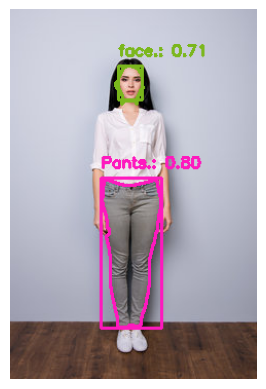

In [151]:
plot_detections(image_array, detections, "person-segmentation.png")

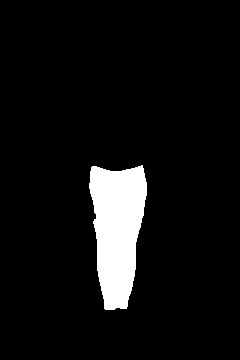

In [152]:
garment_mask = detections[0].mask
garment_mask_image = Image.fromarray(garment_mask).convert("L")
garment_mask_image

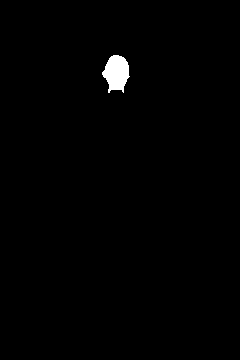

In [153]:
face_mask = detections[1].mask
face_mask_image = Image.fromarray(face_mask).convert("L")
face_mask_image

## Running Inpainting Model

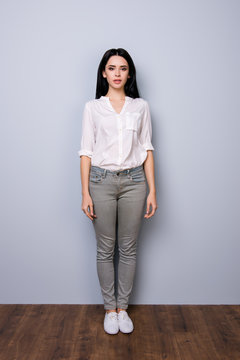

In [154]:
person_image = Image.open(person).convert("RGB")
person_image

In [155]:
def make_inpaint_condition(image, image_mask):
    image = np.array(image.convert("RGB")).astype(np.float32) / 255.0
    image_mask = np.array(image_mask.convert("L")).astype(np.float32) / 255.0

    assert image.shape[0:1] == image_mask.shape[0:1], "image and image_mask must have the same image size"
    image[image_mask > 0.5] = -1.0  # set as masked pixel
    image = np.expand_dims(image, 0).transpose(0, 3, 1, 2)
    image = torch.from_numpy(image)
    return image


control_image = make_inpaint_condition(person_image, garment_mask_image)

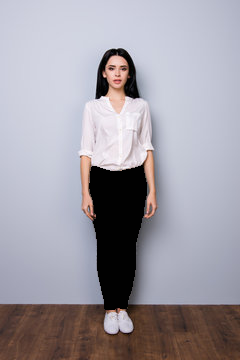

In [156]:
# Assume your tensor is stored in a variable called `tensor_img`
# If it has a batch dimension (e.g., shape [1, 3, H, W]), remove it:
tensor_img = control_image.squeeze(0)  # now shape is [3, H, W]

# Rearrange dimensions from [C, H, W] to [H, W, C]
np_img = tensor_img.permute(1, 2, 0).cpu().numpy()

# If the tensor values are in the range [0, 1], scale them to [0, 255]
np_img = (np_img * 255).astype(np.uint8)

# Create a PIL image
pil_img = Image.fromarray(np_img)

# Display or save the image
pil_img.show()
pil_img.save('control_image.jpg')

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['. the background of the image is white with a dotted pattern , which could be a representation of a plain surface or a piece of paper . the blue color of the jeans and the stars stands out against the white background , making the embellishments and the overall style of the jeans quite noticeable . keep the face unchanged . do not modify the face at all . only change the specified garment .']


  0%|          | 0/40 [00:00<?, ?it/s]

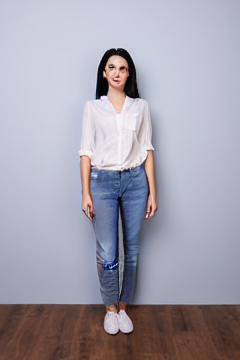

In [157]:
generator = torch.Generator(device="cuda").manual_seed(0)
image = pipe(
    prompt=description + "Keep the face unchanged. Do not modify the face at all. Only change the specified garment.",
    negative_prompt = "distorted, face changed, not proportional",
    image = person_image,
    mask_image=garment_mask_image,
    control_image = control_image,
    num_inference_steps = 40,
    generator=generator,
).images[0]
image

Token indices sequence length is longer than the specified maximum sequence length for this model (155 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['. the background of the image is white with a dotted pattern, which could be a representation of a plain surface or a piece of paper. the blue color of the jeans and the stars stands out against the white background, making the embellishments and the overall style of the jeans quite noticeable. keep the face unchanged. do not modify the face at all. only change the specified garment.']
Token indices sequence length is longer than the specified maximum sequence length for this model (155 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['. the background of the image is white 

  0%|          | 0/39 [00:00<?, ?it/s]

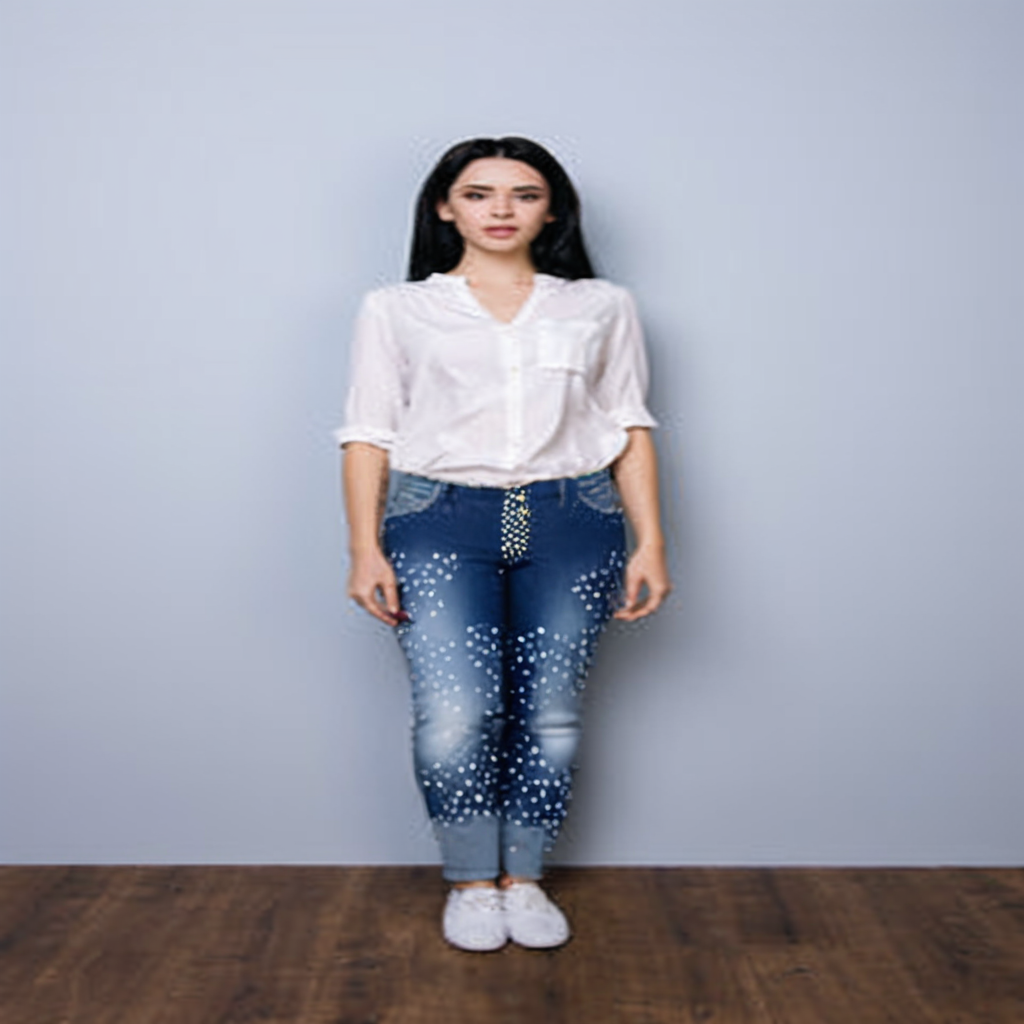

In [161]:
generator = torch.Generator(device="cuda").manual_seed(0)
# Trying out SDXL checkpoint
#temp = "a simple, red t - shirt with a basic design, featuring a rectangular shape, short sleeves, and a round neckline. the shirt is depicted in a bold red color against a white dotted background."
image_2 = pipeline(
    prompt= description + "Keep the face unchanged. Do not modify the face at all. Only change the specified garment.",
    negative_prompt = "distorted, face changed, not proportional",
    image = person_image,
    mask_image=garment_mask_image,
    control_image = control_image,
    num_inference_steps = 40,
    generator=generator,
).images[0]
image_2

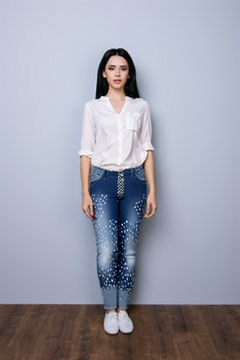

In [162]:
resized_image = image_2.resize(person_image.size, resample = Image.LANCZOS) # change to whatever image
resized_image # final image from SDXL

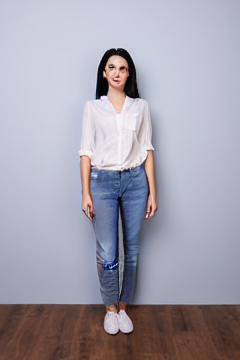

In [163]:
resized_image = image.resize(person_image.size, resample = Image.LANCZOS)
resized_image

## Fixing Face (Mainly Needed for SD 1.5 controlnet pipeline)

In [164]:
from PIL import Image, ImageOps
import cv2

In [165]:
original_img = person_image.convert("RGBA")
inpainted_img = resized_image.convert("RGBA") 

In [166]:
# 3. Extract the bounding box of the face from the mask:
mask_np = np.array(face_mask)
ys, xs = np.where(mask_np > 128)  # white region (face) threshold
if len(xs) == 0 or len(ys) == 0:
    raise ValueError("No face region found in the mask.")
x_min, x_max = xs.min(), xs.max()
y_min, y_max = ys.min(), ys.max()

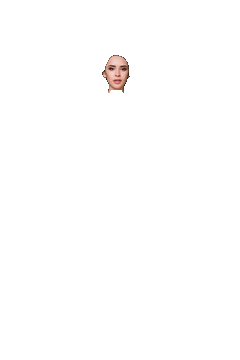

In [167]:
original_face = Image.new("RGBA", original_img.size)
original_face = Image.composite(original_img, original_face, face_mask_image)
original_face.show()

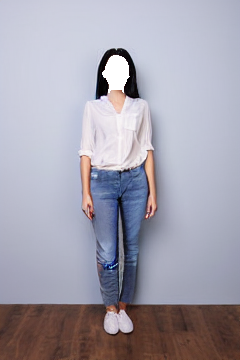

In [168]:
inpainted_without_face = inpainted_img.copy()
# Make the face region transparent on the inpainted image using the face mask:
transparent_bg = Image.new("RGBA", inpainted_img.size, (0, 0, 0, 0))
inpainted_without_face = Image.composite(transparent_bg, inpainted_without_face, face_mask_image)
inpainted_without_face.show()

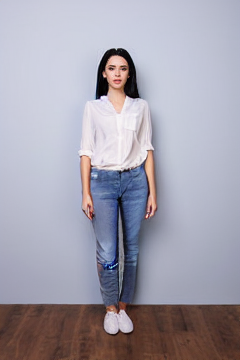

In [169]:
final_img = Image.alpha_composite(inpainted_without_face, original_face)

final_img.save(f"final_person_with_{garment_type}_1.5.png")
final_img.show() # final image from SD 1.5 

## Pose

In [176]:
from diffusers import StableDiffusionControlNetPipeline, SD3ControlNetModel

In [174]:
pose_controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/control_v11p_sd15_openpose", 
    torch_dtype=torch.float16
)

In [177]:
pose_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", 
    controlnet=controlnet, 
    torch_dtype=torch.float16
)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker%2Fconfig.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [179]:
pose_pipe.to('cuda:3')

StableDiffusionControlNetPipeline {
  "_class_name": "StableDiffusionControlNetPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "controlnet": [
    "diffusers",
    "ControlNetModel"
  ],
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
pose_person = pose_pipe(